In [48]:
import os
from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
def listfiles(root, pattern):
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                yield os.path.join(path, name)

In [40]:
dataDirectory = "../data/"
testsDirectory = "tests/"
testsCompletosDiretory = "tests/test_completos/"

In [43]:
path = testsDirectory
filename = "test1"

expected = pd.read_table(f"{path}{filename}.expected", names = ["expected"])
output = pd.read_table(f"{path}{filename}.out", names = ["output"])

data = pd.concat([expected, output], axis=1)
dif = np.array(expected) - np.array(output)


-9.934104992318874e-09

**test1** 
mean:-9.934104992318874e-09, median:-9.021750013715746e-10, var:5.847516210544862e-14

diferencias (1ras 5)
 [[ 3.2279778e-07]
 [ 1.7449570e-07]
 [ 1.0838318e-07]
 [-1.1018753e-07]
 [-1.3818550e-07]]


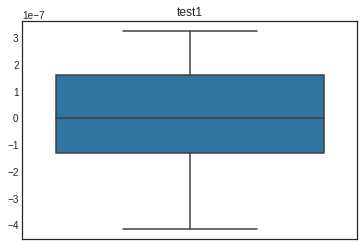

**test2** 
mean:9.934106676157128e-09, median:-5.010032494423555e-08, var:7.951325543214004e-14

diferencias (1ras 5)
 [[-3.2995415e-07]
 [ 4.1978073e-07]
 [-2.4007416e-07]
 [ 3.1005287e-07]
 [-1.8009567e-07]]


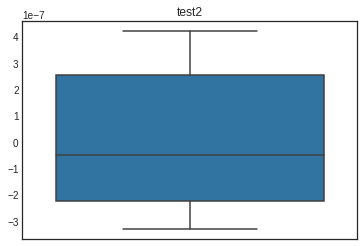

In [ ]:
for path in [dataDirectory, testsDirectory]:
    for filename in listfiles(path, "*.in"):
        expected = pd.read_table(filename.replace(".in", ".expected"), names = ["expected"])
        output = pd.read_table(filename.replace(".in", ".out"), names = ["output"])
        
        data = pd.concat([expected, output], axis=1)
        dif = np.array(expected) - np.array(output)
        
        testname = filename.split("/")[-1].replace(".in", "")
        
        print(f"**{testname}** \nmean:{dif.mean()}, median:{np.median(dif)}, var:{dif.var()}")
        print("\ndiferencias (1ras 5)\n", dif[:5])
        
        sns.boxplot(y=dif)
        plt.title(testname)
        plt.show()
        